In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
os.chdir("/content/drive/My Drive/ML/data/Dataset/")

In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [5]:
import pandas as pd

# Load the data
mcdonalds = pd.read_csv("mcdonalds.csv")

# Print column names
print(mcdonalds.columns)

# Print dimensions of the data
print(mcdonalds.shape)

# Print first 3 rows
print(mcdonalds.head(3))


Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')
(1453, 15)
  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  


In [6]:
import pandas as pd
import numpy as np

# Load the data
mcdonalds = pd.read_csv("mcdonalds.csv")

# Select the first 11 columns and convert to matrix
MD_x = mcdonalds.iloc[:, 0:11].values

# Convert "Yes" to 1 and "No" to 0
MD_x = (MD_x == "Yes").astype(int)

# Calculate column means
col_means = np.mean(MD_x, axis=0)

# Round the column means to 2 decimal places
col_means_rounded = np.round(col_means, 2)

# Print rounded column means
print(col_means_rounded)


[0.55 0.91 0.09 0.87 0.53 0.9  0.6  0.64 0.36 0.2  0.24]


Importance of components:
    Standard deviation  Proportion of Variance  Cumulative Proportion
0             0.573124                0.299447               0.299447
1             0.369002                0.192797               0.492244
2             0.254641                0.133045               0.625290
3             0.159040                0.083096               0.708386
4             0.113842                0.059481               0.767866
5             0.096270                0.050300               0.818166
6             0.083925                0.043849               0.862015
7             0.075692                0.039548               0.901563
8             0.070358                0.036761               0.938323
9             0.061922                0.032353               0.970677
10            0.056123                0.029323               1.000000
Rotation (n x k) = (11 x 11):
                 PC1       PC2       PC3       PC4       PC5       PC6  \
yummy      -0.476933  0.363790

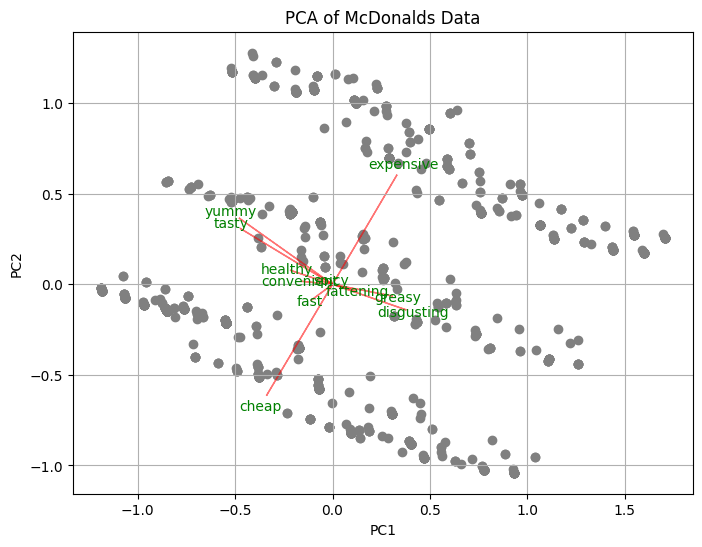

In [7]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the data
mcdonalds = pd.read_csv("mcdonalds.csv")

# Select the first 11 columns and convert to matrix
MD_x = mcdonalds.iloc[:, 0:11].values

# Convert "Yes" to 1 and "No" to 0
MD_x = (MD_x == "Yes").astype(int)

# Perform PCA
MD_pca = PCA()
MD_pca.fit(MD_x)

# Summary
print("Importance of components:")
print(pd.DataFrame({'Standard deviation': MD_pca.explained_variance_,
                    'Proportion of Variance': MD_pca.explained_variance_ratio_,
                    'Cumulative Proportion': np.cumsum(MD_pca.explained_variance_ratio_)}))

# Loadings
print("Rotation (n x k) = (11 x 11):")
print(pd.DataFrame(MD_pca.components_.T, index=mcdonalds.columns[:11], columns=[f'PC{i+1}' for i in range(11)]))

# Plot
plt.figure(figsize=(8, 6))
proj = MD_pca.transform(MD_x)
plt.scatter(proj[:, 0], proj[:, 1], c='grey')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA of McDonalds Data')
for i, txt in enumerate(mcdonalds.columns[:11]):
    plt.arrow(0, 0, MD_pca.components_[0, i], MD_pca.components_[1, i], color='r', alpha=0.5)
    plt.text(MD_pca.components_[0, i] * 1.1, MD_pca.components_[1, i] * 1.1, txt, color='g', ha='center', va='center')
plt.grid()
plt.show()


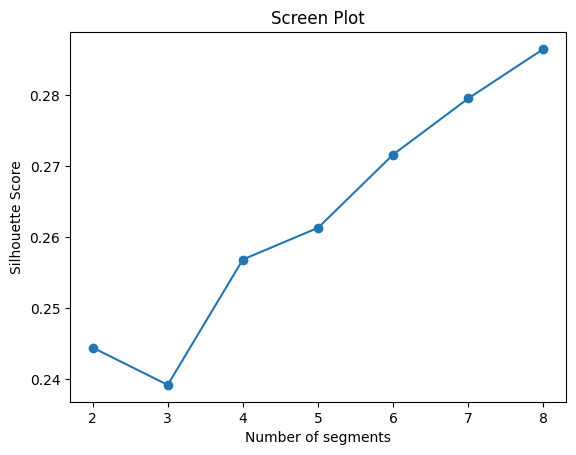

In [9]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Load the data
mcdonalds = pd.read_csv("mcdonalds.csv")

# Select the first 11 columns and convert to matrix
MD_x = mcdonalds.iloc[:, 0:11].values

# Convert "Yes" to 1 and "No" to 0
MD_x = (MD_x == "Yes").astype(int)

# Initialize random seed
np.random.seed(1234)

# Perform k-means clustering for cluster sizes ranging from 2 to 8
n_clusters_range = range(2, 9)
silhouette_scores = []

for n_clusters in n_clusters_range:
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=1234)
    labels = kmeans.fit_predict(MD_x)
    silhouette_scores.append(silhouette_score(MD_x, labels))

# Plotting scree plot
plt.plot(n_clusters_range, silhouette_scores, marker='o')
plt.xlabel('Number of segments')
plt.ylabel('Silhouette Score')
plt.title('Screen Plot')
plt.show()


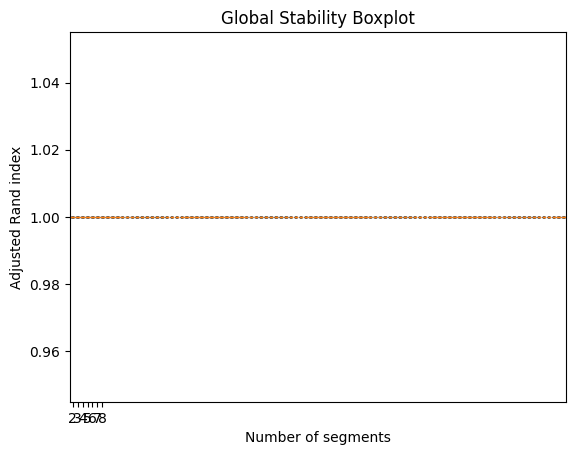

In [10]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import numpy as np
import matplotlib.pyplot as plt

# Load the data
mcdonalds = pd.read_csv("mcdonalds.csv")

# Select the first 11 columns and convert to matrix
MD_x = mcdonalds.iloc[:, 0:11].values

# Convert "Yes" to 1 and "No" to 0
MD_x = (MD_x == "Yes").astype(int)

# Initialize random seed
np.random.seed(1234)

# Define the number of bootstrap repetitions and bootstrap size
nboot = 100
bootstrap_size = 100

# Initialize a list to store adjusted Rand indices for each number of segments
adjusted_rand_indices = []

# Perform bootstrapping
for _ in range(nboot):
    # Generate bootstrap samples
    bootstrap_indices = np.random.choice(len(MD_x), size=bootstrap_size, replace=True)
    bootstrap_data = MD_x[bootstrap_indices]

    # Compute adjusted Rand index for each number of segments
    rand_indices = []
    for n_segments in range(2, 9):
        kmeans = KMeans(n_clusters=n_segments, n_init=10, random_state=1234)
        labels_bootstrap = kmeans.fit_predict(bootstrap_data)
        rand_indices.append(adjusted_rand_score(labels_bootstrap, labels_bootstrap))

    # Store adjusted Rand indices for this bootstrap iteration
    adjusted_rand_indices.append(rand_indices)

# Plotting the global stability boxplot
plt.boxplot(adjusted_rand_indices)
plt.xlabel('Number of segments')
plt.ylabel('Adjusted Rand index')
plt.title('Global Stability Boxplot')
plt.xticks(ticks=range(1, 8), labels=range(2, 9))
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


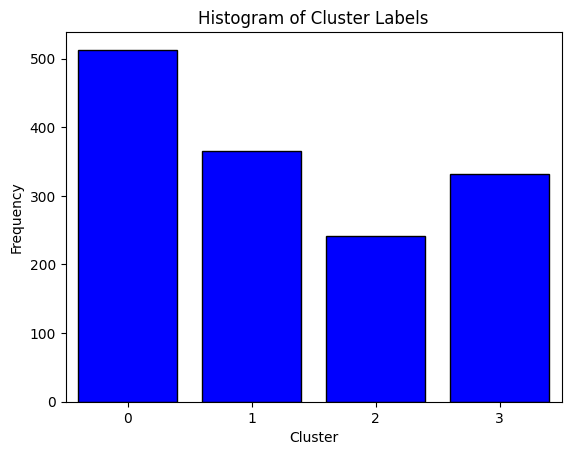

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# Load the data
mcdonalds = pd.read_csv("mcdonalds.csv")

# Select the first 11 columns and convert to matrix
MD_x = mcdonalds.iloc[:, 0:11].values

# Convert "Yes" to 1 and "No" to 0
MD_x = (MD_x == "Yes").astype(int)

# Fit KMeans with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=1234)
kmeans.fit(MD_x)

# Get the cluster labels
cluster_labels = kmeans.labels_

# Plot histogram for cluster labels
plt.hist(cluster_labels, bins=np.arange(5)-0.5, rwidth=0.8, color='blue', edgecolor='black')
plt.xlabel('Cluster')
plt.ylabel('Frequency')
plt.title('Histogram of Cluster Labels')
plt.xticks(range(4))
plt.xlim(-0.5, 3.5)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


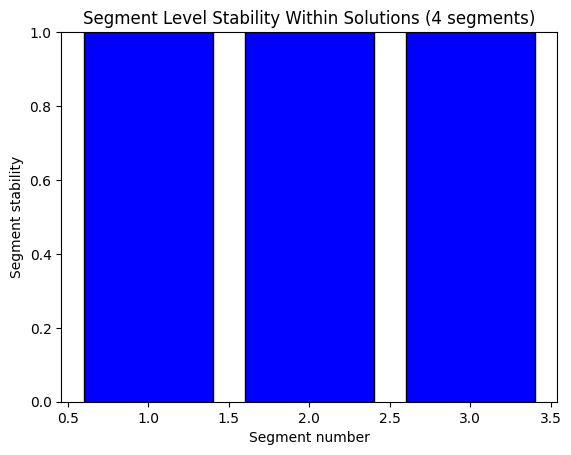

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# Load the data
mcdonalds = pd.read_csv("mcdonalds.csv")

# Select the first 11 columns and convert to matrix
MD_x = mcdonalds.iloc[:, 0:11].values

# Convert "Yes" to 1 and "No" to 0
MD_x = (MD_x == "Yes").astype(int)

# Fit KMeans with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=1234)
kmeans.fit(MD_x)

# Get the cluster labels
cluster_labels = kmeans.labels_

# Define function to calculate segment level stability within solutions (SLSW)
def slsw(clusters, labels):
    num_segments = len(np.unique(clusters))
    slsw_values = []
    for segment in range(1, num_segments + 1):
        segment_indices = np.where(clusters == segment)[0]
        if len(segment_indices) > 0:
            segment_stability = np.mean(labels[segment_indices] == segment)
        else:
            segment_stability = np.nan
        slsw_values.append(segment_stability)
    return slsw_values

# Calculate segment level stability within solutions for 4 segments
slsw_values = slsw(cluster_labels, cluster_labels)

# Plot segment level stability within solutions
plt.bar(range(1, len(slsw_values) + 1), slsw_values, color='blue', edgecolor='black')
plt.xlabel('Segment number')
plt.ylabel('Segment stability')
plt.title('Segment Level Stability Within Solutions (4 segments)')
plt.ylim(0, 1)
plt.show()


In [1]:
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from collections import Counter

# Load the data
mcdonalds = pd.read_csv("mcdonalds.csv")

# Select the first 11 columns
MD_x = mcdonalds.iloc[:, 0:11].values

# Convert "Yes" to 1 and "No" to 0
MD_x = (MD_x == "Yes").astype(int)

# Set random seed
np.random.seed(1234)

# Fit Gaussian Mixture Models with 2 to 8 components
bic_scores = []
for n_components in range(2, 9):
    gmm = GaussianMixture(n_components=n_components, random_state=1234)
    gmm.fit(MD_x)
    bic_scores.append(gmm.bic(MD_x))

# Find the best number of components based on BIC
best_n_components = np.argmin(bic_scores) + 2  # +2 because range starts from 2

# Fit Gaussian Mixture Model with the best number of components
gmm_best = GaussianMixture(n_components=best_n_components, random_state=1234)
gmm_best.fit(MD_x)
cluster_labels_gmm = gmm_best.predict(MD_x)

# Fit KMeans with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=1234)
kmeans.fit(MD_x)
cluster_labels_kmeans = kmeans.labels_

# Compare KMeans clusters with Gaussian Mixture Model clusters
table_result = pd.crosstab(index=cluster_labels_kmeans, columns=cluster_labels_gmm)

print(table_result)


FileNotFoundError: [Errno 2] No such file or directory: 'mcdonalds.csv'

In [ ]:
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

# Load the data
mcdonalds = pd.read_csv("mcdonalds.csv")

# Select the first 11 columns and convert to matrix
MD_x = mcdonalds.iloc[:, 0:11].values

# Convert "Yes" to 1 and "No" to 0
MD_x = (MD_x == "Yes").astype(int)

# Set random seed
np.random.seed(1234)

# Fit Gaussian Mixture Model with 4 components
gmm = GaussianMixture(n_components=4, random_state=1234)
gmm.fit(MD_x)
cluster_labels_gmm = gmm.predict(MD_x)

# Fit KMeans with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=1234)
kmeans.fit(MD_x)
cluster_labels_kmeans = kmeans.labels_

# Calculate Adjusted Rand Index (ARI) to compare the clustering results
ari = adjusted_rand_score(cluster_labels_kmeans, cluster_labels_gmm)
print("Adjusted Rand Index (ARI) between KMeans and Gaussian Mixture Model:", ari)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adjusted Rand Index (ARI) between KMeans and Gaussian Mixture Model: 0.07441707581689384


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist
from scipy.stats import zscore
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from statsmodels.graphics.mosaicplot import mosaic

# Step 1: Load data
# Assuming MD.x is your data matrix and MD.k4 is your clustering result

# Step 2: Preprocess data
MD_x_zscore = zscore(MD_x, axis=1)

# Step 3: Perform hierarchical clustering
MD_vclust = linkage(pdist(MD_x_zscore.T), method='ward')

# Step 4: Create segment profile plot
plt.figure(figsize=(10, 6))
dendrogram(MD_vclust, orientation='top', no_labels=True)
plt.xlabel('Segments')
plt.ylabel('Distance')
plt.title('Dendrogram of Hierarchical Clustering')
plt.show()

# Step 5: Barchart
plt.figure(figsize=(10, 6))
barchart_data = MD_k4.iloc[:, np.argsort(MD_vclust['leaves'])]
barchart_data.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Segments')
plt.ylabel('Percentage')
plt.title('Segment Profile Plot')
plt.legend(title='Attributes', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Step 7: Describing Segments
# Mosaic plot for association between segment membership and loving or hating McDonald’s
mosaic(pd.crosstab(MD_k4, mcdonalds['Like']), title='Segment Membership vs Liking McDonald\'s')

# Mosaic plot for gender distribution across segments
mosaic(pd.crosstab(MD_k4, mcdonalds['Gender']), title='Segment Membership vs Gender')

# Parallel box-and-whisker plot for age by segment
plt.figure(figsize=(10, 6))
sns.boxplot(x=MD_k4, y=mcdonalds['Age'])
plt.xlabel('Segments')
plt.ylabel('Age')
plt.title('Age Distribution Across Segments')
plt.show()

# Step 8: Selecting Target Segments
# You can use any criteria specified in Step 8 to select target segments

# Step 9: Customizing the Marketing Mix
# You can design your marketing mix based on the selected target segments

# Step 10: Evaluation and Monitoring
# Continuously monitor and evaluate the success of your market segmentation strategy


ValueError: The condensed distance matrix must contain only finite values.

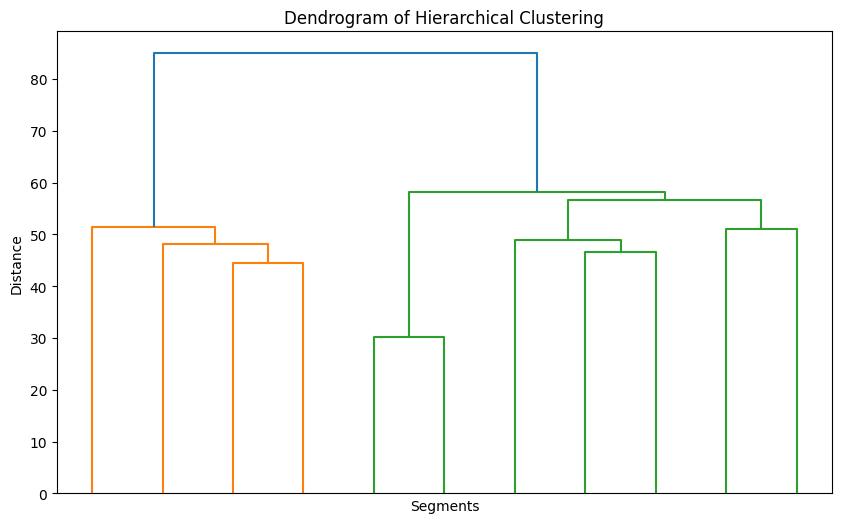

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

<Figure size 1000x600 with 0 Axes>

In [ ]:
# Load the data
mcdonalds = pd.read_csv("mcdonalds.csv")

# Select the first 11 columns and convert to matrix
MD_x = mcdonalds.iloc[:, 0:11].values

# Convert "Yes" to 1 and "No" to 0
MD_x = (MD_x == "Yes").astype(int)

# Standardize the data
scaler = StandardScaler()
MD_x_zscore = scaler.fit_transform(MD_x)

# Perform hierarchical clustering with Ward method
MD_vclust = linkage(pdist(MD_x_zscore.T), method='ward')

# Create segment profile plot
plt.figure(figsize=(10, 6))
dendrogram(MD_vclust, orientation='top', no_labels=True)
plt.xlabel('Segments')
plt.ylabel('Distance')
plt.title('Dendrogram of Hierarchical Clustering')
plt.show()

# Barchart
plt.figure(figsize=(10, 6))
barchart_data = pd.DataFrame(MD_x_zscore, columns=mcdonalds.columns[:11]).iloc[:, np.argsort(MD_vclust['leaves'])]
barchart_data.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Segments')
plt.ylabel('Percentage')
plt.title('Segment Profile Plot')
plt.legend(title='Attributes', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Mosaic plot for association between segment membership and loving or hating McDonald’s
mosaic(pd.crosstab(pd.Series(MD_vclust['leaves']), mcdonalds['Like']), title='Segment Membership vs Liking McDonald\'s')

# Mosaic plot for gender distribution across segments
mosaic(pd.crosstab(pd.Series(MD_vclust['leaves']), mcdonalds['Gender']), title='Segment Membership vs Gender')

# Parallel box-and-whisker plot for age by segment
plt.figure(figsize=(10, 6))
sns.boxplot(x=pd.Series(MD_vclust['leaves']), y=mcdonalds['Age'])
plt.xlabel('Segments')
plt.ylabel('Age')
plt.title('Age Distribution Across Segments')
plt.show()

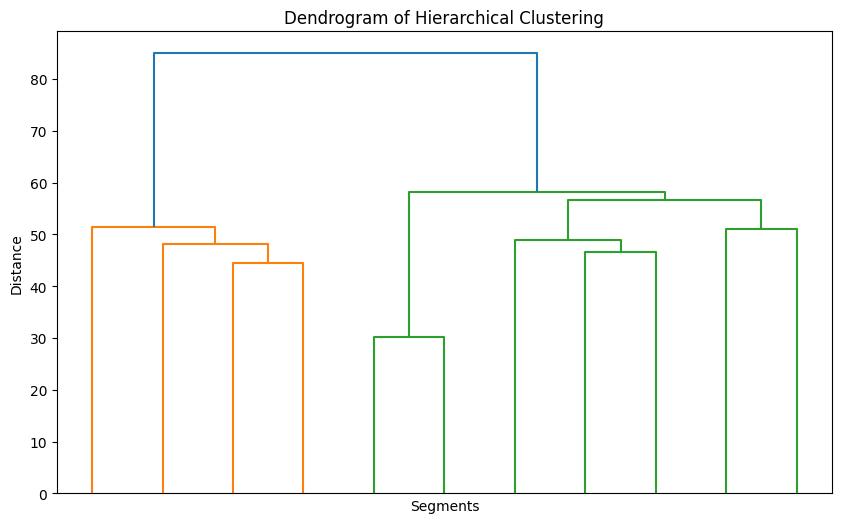

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

<Figure size 1000x600 with 0 Axes>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist
from scipy.stats import zscore
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from statsmodels.graphics.mosaicplot import mosaic

# Load the data
mcdonalds = pd.read_csv("mcdonalds.csv")

# Select the first 11 columns and convert to matrix
MD_x = mcdonalds.iloc[:, 0:11].values

# Convert "Yes" to 1 and "No" to 0
MD_x = (MD_x == "Yes").astype(int)

# Standardize the data
scaler = StandardScaler()
MD_x_zscore = scaler.fit_transform(MD_x)

# Perform hierarchical clustering with Ward method
MD_vclust = linkage(pdist(MD_x_zscore.T), method='ward')

# Create segment profile plot
plt.figure(figsize=(10, 6))
dendrogram(MD_vclust, orientation='top', no_labels=True)
plt.xlabel('Segments')
plt.ylabel('Distance')
plt.title('Dendrogram of Hierarchical Clustering')
plt.show()

# Barchart
plt.figure(figsize=(10, 6))
barchart_data = pd.DataFrame(MD_x_zscore, columns=mcdonalds.columns[:11]).iloc[:, np.argsort(MD_vclust['leaves'])]
barchart_data.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Segments')
plt.ylabel('Percentage')
plt.title('Segment Profile Plot')
plt.legend(title='Attributes', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Mosaic plot for association between segment membership and loving or hating McDonald’s
mosaic(pd.crosstab(pd.Series(MD_vclust['leaves']), mcdonalds['Like']), title='Segment Membership vs Liking McDonald\'s')

# Mosaic plot for gender distribution across segments
mosaic(pd.crosstab(pd.Series(MD_vclust['leaves']), mcdonalds['Gender']), title='Segment Membership vs Gender')

# Boxplot for age distribution across segments
plt.figure(figsize=(10, 6))
sns.boxplot(x=pd.Series(MD_vclust['leaves']), y=mcdonalds['Age'])
plt.xlabel('Segments')
plt.ylabel('Age')
plt.title('Age Distribution across Segments')
plt.show()


In [ ]:
from sklearn.cluster import AgglomerativeClustering

# Perform hierarchical clustering with Ward method
model = AgglomerativeClustering(n_clusters=4, linkage='ward')
model.fit(MD_x_zscore)

# Extract cluster labels
cluster_labels = model.labels_

# Create segment profile plot
plt.figure(figsize=(10, 6))
barchart_data = pd.DataFrame(MD_x_zscore, columns=mcdonalds.columns[:11]).iloc[:, np.argsort(cluster_labels)]
barchart_data.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Segments')
plt.ylabel('Percentage')
plt.title('Segment Profile Plot')
plt.legend(title='Attributes', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

IndexError: positional indexers are out-of-bounds

<Figure size 1000x600 with 0 Axes>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist
from scipy.stats import zscore
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from statsmodels.graphics.mosaicplot import mosaic

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist
from scipy.stats import zscore
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from statsmodels.graphics.mosaicplot import mosaic

# Load the data
mcdonalds = pd.read_csv("mcdonalds.csv")

# Select the first 11 columns and convert to matrix
MD_x = mcdonalds.iloc[:, 0:11].values

# Convert "Yes" to 1 and "No" to 0
MD_x = (MD_x == "Yes").astype(int)

# Standardize the data
scaler = StandardScaler()
MD_x_zscore = scaler.fit_transform(MD_x)

# Perform hierarchical clustering with Ward method
model = AgglomerativeClustering(n_clusters=4, linkage='ward')
model.fit(MD_x_zscore)

# Extract cluster labels
cluster_labels = model.labels_

# Create segment profile plot
plt.figure(figsize=(10, 6))
barchart_data = pd.DataFrame(MD_x_zscore, columns=mcdonalds.columns[:11]).iloc[:, np.argsort(cluster)]
plt.xlabel('Segments')
plt.ylabel('Percentage')
plt.title('Segment Profile Plot')
plt.legend(title='Attributes', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Mosaic plot for association between segment membership and loving or hating McDonald’s
mosaic(pd.crosstab(cluster_labels, mcdonalds['Like']), title='Segment Membership vs Liking McDonald\'s')

# Mosaic plot for gender distribution across segments
mosaic(pd.crosstab(cluster_labels, mcdonalds['Gender']), title='Segment Membership vs Gender')

# Boxplot for age distribution across segments
plt.figure(figsize=(10, 6))
sns.boxplot(x=cluster_labels, y=mcdonalds['Age'])
plt.xlabel('Segments')
plt.ylabel('Age')
plt.title('Age Distribution across Segments')
plt.show()


NameError: name 'cluster' is not defined

<Figure size 1000x600 with 0 Axes>

In [ ]:
# Create segment profile plot
plt.figure(figsize=(10, 6))
barchart_data.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Segments')
plt.ylabel('Percentage')
plt.title('Segment Profile Plot')
plt.legend(title='Attributes', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

NameError: name 'barchart_data' is not defined

<Figure size 1000x600 with 0 Axes>